## Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed/WESAD/data_processed/30s/all_data.csv', index_col=0)
df.head(10)

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,...,hr_sdnn_ratio,acc_hr_slope_diff,sdnn_netacc_ratio,eda_hr_interaction,eda_resp_ratio,hr_resp_interaction,hrv_composite,hrv_stress_index,arousal_index,focus_label
0,53.356667,16.646000,22.310000,63.403083,3.464344,0.640051,0.042624,-0.001226,23.547401,3.927255,...,0.484254,3.603922,2.786436,54.757937,0.010853,2014.537539,122.855695,1.245035,1289.407069,1
1,54.384667,14.914000,23.598000,63.423202,2.527858,0.522190,0.027494,-0.000580,24.049974,3.610985,...,0.470618,1.264275,3.103511,48.372475,0.007614,2227.841975,184.537901,0.704795,1163.356764,1
2,55.673333,17.130000,22.103333,63.371988,1.759675,0.504689,0.013444,0.000012,23.252303,3.880405,...,0.473227,-0.742401,3.019624,45.702928,0.003465,2105.649261,177.633397,0.738724,1062.698301,1
3,50.268000,20.538000,26.323333,63.354186,2.607511,0.505930,0.016788,0.000090,22.749655,2.992443,...,0.448400,4.537308,3.124974,44.913563,0.005610,2019.584005,179.032540,0.762547,1021.768085,1
4,53.884667,13.176000,-20.754667,63.015126,1.203854,0.455631,0.021998,-0.000634,22.229279,6.140247,...,0.690826,7.844220,1.775132,35.209239,0.003583,1717.786631,92.813257,0.857373,782.676010,1
5,50.273333,25.046667,15.344000,63.379411,2.137492,0.390891,0.016305,-0.000458,21.609385,2.637111,...,0.605929,4.037823,2.212658,33.215446,0.006183,1836.227356,115.309797,0.948844,717.765359,1
6,53.982000,26.252000,17.136667,63.424968,0.871813,0.361442,0.014805,-0.000326,23.378201,4.010276,...,0.409805,-7.953004,3.652124,34.310077,0.003692,2219.187217,210.631554,0.718897,802.107854,1
7,54.366000,25.382000,20.492667,63.447958,0.413116,0.329505,0.016684,-0.000409,22.043036,2.176582,...,0.443754,-3.593902,3.302668,30.639888,0.007665,2049.730009,161.954025,1.003510,675.396167,1
8,44.229333,16.220667,-32.767333,63.142306,1.199372,0.281476,0.014150,-0.000311,24.014866,4.418985,...,0.458001,4.421966,3.059566,24.905113,0.003202,2124.842722,172.989547,0.753024,598.092956,1
9,42.374667,13.378667,-44.673333,63.016231,0.365034,0.242791,0.010291,-0.000257,21.259364,2.974239,...,0.443430,6.883157,2.861205,19.411452,0.003460,1699.715861,157.300446,0.788235,412.675119,1


In [3]:
df['focus_label']

0      1
1      1
2      1
3      1
4      1
      ..
881    0
882    0
883    0
884    0
885    0
Name: focus_label, Length: 886, dtype: int64

In [4]:
focus_corr = df.corr()['focus_label'].drop(['focus_label', 'label', 'subject'])
top_features = focus_corr.abs().sort_values(ascending=False).head(17).index.tolist()

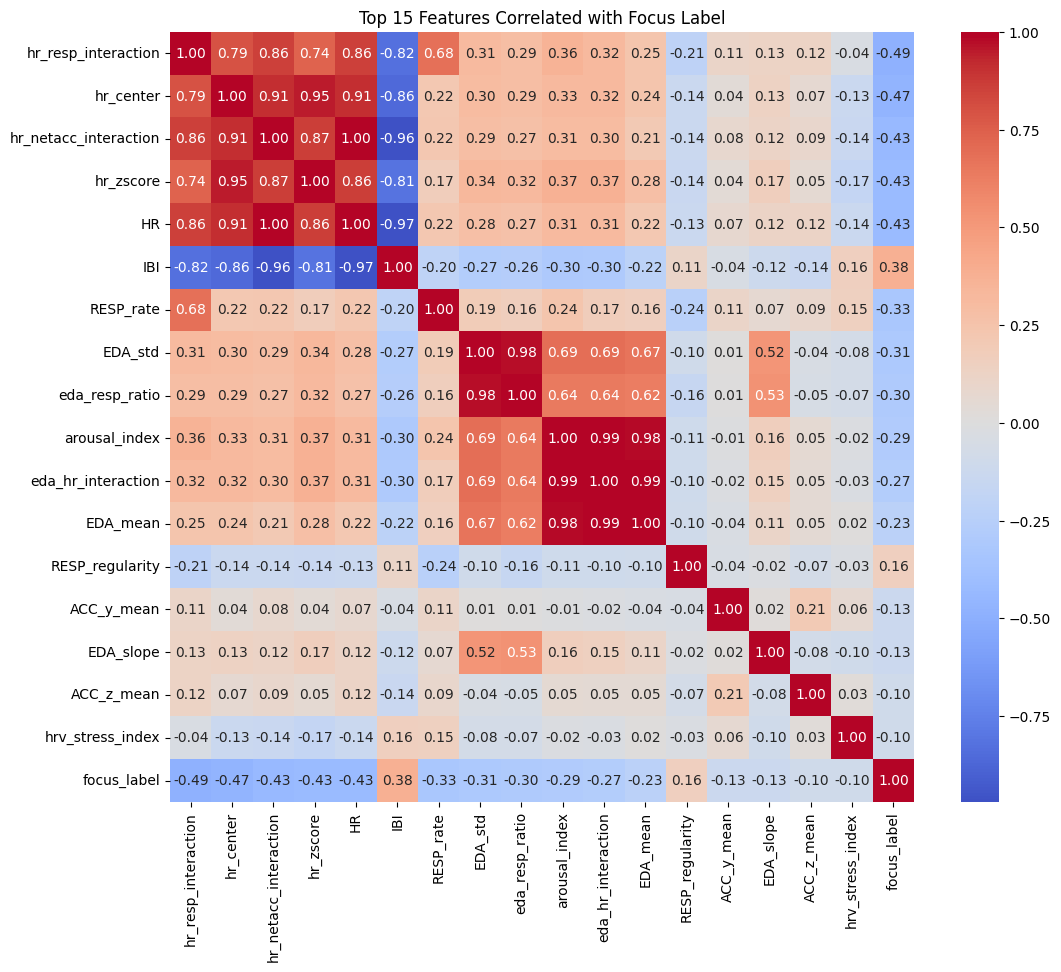

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features + ['focus_label']].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Top 15 Features Correlated with Focus Label")
plt.show()

In [6]:
selected_columns =  top_features + ['subject', 'focus_label']

In [7]:
df_top = df[selected_columns]
df_top.head()

,hr_resp_interaction,hr_center,hr_netacc_interaction,hr_zscore,HR,IBI,RESP_rate,EDA_std,eda_resp_ratio,arousal_index,eda_hr_interaction,EDA_mean,RESP_regularity,ACC_y_mean,EDA_slope,ACC_z_mean,hrv_stress_index,subject,focus_label
0,2014.537539,-4.075092,5424.288387,-0.386345,85.552438,754.407051,23.547401,0.042624,0.010853,1289.407069,54.757937,0.640051,3.927255,16.646,-0.001226,22.310000,1.245035,2,1
1,2227.841975,3.006332,5875.136190,0.285020,92.633862,707.698171,24.049974,0.027494,0.007614,1163.356764,48.372475,0.522190,3.610985,14.914,-0.000580,23.598000,0.704795,2,1
2,2105.649261,0.929061,5738.751225,0.088081,90.556591,714.939024,23.252303,0.013444,0.003465,1062.698301,45.702928,0.504689,3.880405,17.130,0.000012,22.103333,0.738724,2,1
3,2019.584005,-0.853262,5624.221511,-0.080895,88.774268,735.156250,22.749655,0.016788,0.005610,1021.768085,44.913563,0.505930,2.992443,20.538,0.000090,26.323333,0.762547,2,1
4,1717.786631,-12.351672,4869.547945,-1.171018,77.275859,798.986486,22.229279,0.021998,0.003583,782.676010,35.209239,0.455631,6.140247,13.176,-0.000634,-20.754667,0.857373,2,1


In [8]:
df_top.describe()

,hr_resp_interaction,hr_center,hr_netacc_interaction,hr_zscore,HR,IBI,RESP_rate,EDA_std,eda_resp_ratio,arousal_index,eda_hr_interaction,EDA_mean,RESP_regularity,ACC_y_mean,EDA_slope,ACC_z_mean,hrv_stress_index,subject,focus_label
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,1902.136192,-0.521794,5487.176312,-0.038901,86.261714,757.410397,21.952667,0.039894,0.022228,3670.143371,162.519314,1.799660,2.178978,-2.135094,0.000011,17.859836,0.776850,9.554176,0.553047
std,429.529172,12.779133,903.803572,0.979897,14.250047,119.146446,2.644896,0.076187,0.045675,5217.970222,221.561536,2.342243,1.173071,24.042753,0.001678,27.678082,0.143545,4.691006,0.497459
min,1037.897460,-33.239231,3471.493025,-2.292403,52.876293,440.998134,16.181853,0.001103,0.000114,125.872433,6.961599,0.092480,1.140682,-60.540000,-0.006442,-61.548000,0.554398,2.000000,0.000000
25%,1575.572358,-10.442897,4805.896149,-0.818604,75.769236,672.052557,20.006669,0.003044,0.001577,521.229582,23.749411,0.287781,1.527634,-17.181833,-0.000255,-0.707833,0.687136,5.000000,0.000000
50%,1868.954864,-1.555230,5385.473155,-0.149669,84.999372,754.006410,22.086875,0.010018,0.005011,1214.547875,57.890753,0.730586,1.784365,-1.248333,-0.000021,20.569333,0.744982,9.000000,1.000000
75%,2175.543149,8.223440,6104.320137,0.737785,96.557003,832.956933,24.011434,0.040521,0.020751,5620.124066,250.760145,2.738586,2.327860,10.887167,0.000060,40.255833,0.820940,14.000000,1.000000
max,3394.718011,42.691512,8613.699793,2.554260,137.440788,1139.423077,28.044069,0.806699,0.551698,37683.130779,1474.272902,14.259459,10.249264,62.334667,0.021294,62.902000,1.676081,17.000000,1.000000


## LeaveOneGroupOut model training

In [9]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score

In [10]:
X = df_top.drop(columns=['subject', 'focus_label'])
y = df_top['focus_label']
groups = df_top['subject']

In [11]:
models = {
    'RandomForest': RandomForestClassifier(),
    'Logistic': LogisticRegression(solver='liblinear', max_iter=5000),
    'SVM': SVC()
}

In [12]:
results_f1 = {name: [] for name in models}
results_recall = {name: [] for name in models}

In [13]:
logo = LeaveOneGroupOut()

In [14]:
for train_idx, test_idx in logo.split(X, y, groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary', zero_division=0)

        results_f1[name].append(f1)
        results_recall[name].append(recall)

In [15]:
for name in models:
    print(f"{name}")
    print(f"   Mean F1     = {np.mean(results_f1[name]):.3f}")
    print(f"   Std F1      = {np.std(results_f1[name]):.3f}")
    print(f"   Mean Recall = {np.mean(results_recall[name]):.3f}")
    print(f"   Std Recall  = {np.std(results_recall[name]):.3f}")
    print("-" * 35)

RandomForest
   Mean F1     = 0.641
   Std F1      = 0.310
   Mean Recall = 0.630
   Std Recall  = 0.327
-----------------------------------
Logistic
   Mean F1     = 0.651
   Std F1      = 0.327
   Mean Recall = 0.623
   Std Recall  = 0.336
-----------------------------------
SVM
   Mean F1     = 0.710
   Std F1      = 0.325
   Mean Recall = 0.732
   Std Recall  = 0.356
-----------------------------------


## GroupShuffleSplit model training

In [16]:
from itertools import combinations
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score

In [17]:
X = df_top.drop(columns=['subject', 'focus_label'])
y = df_top['focus_label']
groups = df_top['subject']
subject_ids = sorted(groups.unique())

In [18]:
subject_pairs = list(combinations(subject_ids, 2))

In [19]:
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(solver='liblinear', max_iter=5000),
    'SVM': SVC()
}

In [20]:
results_f1 = {name: [] for name in models}
results_recall = {name: [] for name in models}

In [21]:
for test_subjects in subject_pairs:
    test_mask = groups.isin(test_subjects)
    train_mask = ~test_mask

    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)

        results_f1[name].append(f1)
        results_recall[name].append(recall)

In [22]:
print("2-Subject Cross-Validation Summary\n")
for name in models:
    print(f"{name}")
    print(f"  Mean F1     = {np.mean(results_f1[name]):.3f}")
    print(f"  Std F1      = {np.std(results_f1[name]):.3f}")
    print(f"  Mean Recall = {np.mean(results_recall[name]):.3f}")
    print(f"  Std Recall  = {np.std(results_recall[name]):.3f}")
    print("-" * 35)

2-Subject Cross-Validation Summary

RandomForest
  Mean F1     = 0.663
  Std F1      = 0.175
  Mean Recall = 0.712
  Std Recall  = 0.204
-----------------------------------
LogisticRegression
  Mean F1     = 0.670
  Std F1      = 0.205
  Mean Recall = 0.698
  Std Recall  = 0.227
-----------------------------------
SVM
  Mean F1     = 0.728
  Std F1      = 0.199
  Mean Recall = 0.826
  Std Recall  = 0.208
-----------------------------------
